In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import OneHotEncoder
tf.__version__

'2.12.0'

df_price_car = pd.read_csv('dataset/car_price.csv') 

In [45]:
df_price_car = pd.read_csv('dataset/car_price.csv', index_col=False) 

In [46]:
df_price_car.head()

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,hatchback,rwd,front,gas,std,two,six,ohcv,mpfi,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,sedan,fwd,front,gas,std,four,four,ohc,mpfi,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,sedan,4wd,front,gas,std,four,five,ohc,mpfi,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [47]:
df_price_car_new = pd.DataFrame({
   "carbody": df_price_car['carbody'], 
    "price": df_price_car['price'], 
    "horsepower": df_price_car['horsepower'], 
    "enginesize": df_price_car['enginesize']
})

In [48]:
df_carbody = pd.get_dummies(df_price_car_new['carbody']).replace({True:1, False:0})

In [49]:
df_carbody

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
205,0,0,0,1,0
206,0,0,1,0,0
207,0,0,0,1,0
208,0,0,0,0,1


In [50]:
df_carbody = pd.DataFrame(df_carbody)

In [51]:
df_carbody

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
205,0,0,0,1,0
206,0,0,1,0,0
207,0,0,0,1,0
208,0,0,0,0,1


In [52]:
df_price_car_new = pd.concat([df_carbody, df_price_car_new], axis=1)

In [53]:
df_price_car_new.drop(columns=['carbody'], inplace=True)
df_price_car_new

,convertible,hardtop,hatchback,sedan,wagon,price,horsepower,enginesize
0,1,0,0,0,0,13495.0,111,130
1,1,0,0,0,0,16500.0,111,130
2,0,0,1,0,0,16500.0,154,152
3,0,0,0,1,0,13950.0,102,109
4,0,0,0,1,0,17450.0,115,136
...,...,...,...,...,...,...,...,...
205,0,0,0,1,0,21105.0,121,164
206,0,0,1,0,0,8499.0,88,122
207,0,0,0,1,0,13200.0,95,152
208,0,0,0,0,1,12440.0,97,120


<Axes: >

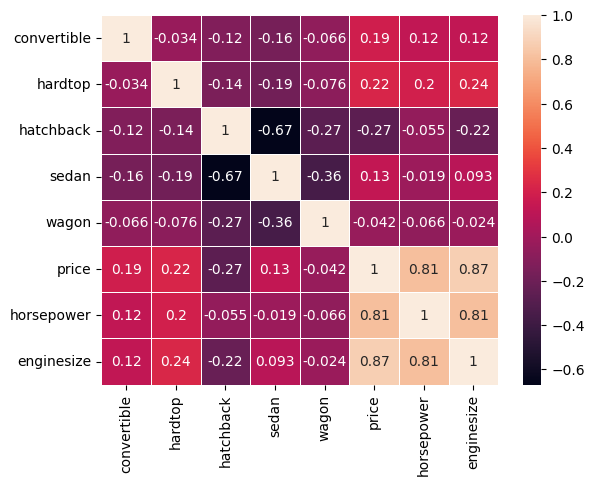

In [54]:
sns.heatmap(df_price_car_new.corr(), annot=True, linewidths=(0.5))

In [55]:
df_price_car_new

,convertible,hardtop,hatchback,sedan,wagon,price,horsepower,enginesize
0,1,0,0,0,0,13495.0,111,130
1,1,0,0,0,0,16500.0,111,130
2,0,0,1,0,0,16500.0,154,152
3,0,0,0,1,0,13950.0,102,109
4,0,0,0,1,0,17450.0,115,136
...,...,...,...,...,...,...,...,...
205,0,0,0,1,0,21105.0,121,164
206,0,0,1,0,0,8499.0,88,122
207,0,0,0,1,0,13200.0,95,152
208,0,0,0,0,1,12440.0,97,120


In [56]:
X_train = df_price_car_new
y_train = df_price_car_new['price']
df_price_car_new.drop(columns=['price'], inplace=True)
X_train.shape

(210, 7)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[1.        , 0.        , 0.        , ..., 0.        , 0.2625    ,
        0.26037736],
       [1.        , 0.        , 0.        , ..., 0.        , 0.2625    ,
        0.26037736],
       [0.        , 0.        , 1.        , ..., 0.        , 0.44166667,
        0.34339623],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.19583333,
        0.34339623],
       [0.        , 0.        , 0.        , ..., 1.        , 0.20416667,
        0.22264151],
       [0.        , 0.        , 0.        , ..., 1.        , 0.19583333,
        0.34339623]])

In [15]:
y_train = y_train.values.reshape(-1,1)

In [16]:
X_train.shape

(210, 7)

In [27]:
y_train = scaler.fit_transform(y_train) #O Fit transform só funciona com matriz 2D

In [29]:
y_train.shape


(210, 1)

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(7,)))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,001
Trainable params: 11,001
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='Adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
7/7 [==============================] - 1s 3ms/step - loss: 0.0492
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0258
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 8/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 10/50
7/7 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 11/50
7/7 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 12/50
7/7 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 13/50
7/7 [==============================] - 0s 2ms/step - loss: 0.

In [22]:
X_test = np.array([1,0,0,0,0,111,130]).reshape(1,-1)
scaler_new = MinMaxScaler()
X_test = scaler_new.fit_transform(X_test)
predict = model.predict(X_test)
predict = scaler.inverse_transform(predict)

1/1 [==============================] - 0s 84ms/step


In [23]:
predict[0]

array([4779.5156], dtype=float32)

In [24]:
model.save("modelo.h5")

In [25]:
with open("minimaxscaler.pkl", "wb") as file:
    pickle.dump(scaler, file)